<a href="https://colab.research.google.com/github/quanndm/kltn/blob/dev/notebooks/transfer_learning/compare_models_metrics.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import json
import matplotlib.pyplot as plt
import numpy as np
from google.colab import drive

In [2]:
drive.flush_and_unmount()
drive.mount("/content/drive")

Drive not mounted, so nothing to flush and unmount.
Mounted at /content/drive


In [3]:
def load_metrics(json_path):
    with open(json_path, 'r') as f:
        return json.load(f)

In [4]:
import glob
print(glob.glob("/content/drive/MyDrive/KLTN/code/result_model_*.json"))

['/content/drive/MyDrive/KLTN/code/result_model_UNet3D.json', '/content/drive/MyDrive/KLTN/code/result_model_UNet3DWCoT.json', '/content/drive/MyDrive/KLTN/code/result_model_UNet3DWCoTDA.json', '/content/drive/MyDrive/KLTN/code/result_model_UNet3DPretrained_pretrained.json']


In [5]:
model_unet3d = load_metrics('/content/drive/MyDrive/KLTN/code/result_model_UNet3DPretrained_pretrained.json')
# model_unet3d_cot = load_metrics('/content/drive/MyDrive/KLTN/code/result_model_UNet3DWCoT.json')
# model_unet3d_cot_da = load_metrics('/content/drive/MyDrive/KLTN/code/result_model_UNet3DWCoTDA.json')

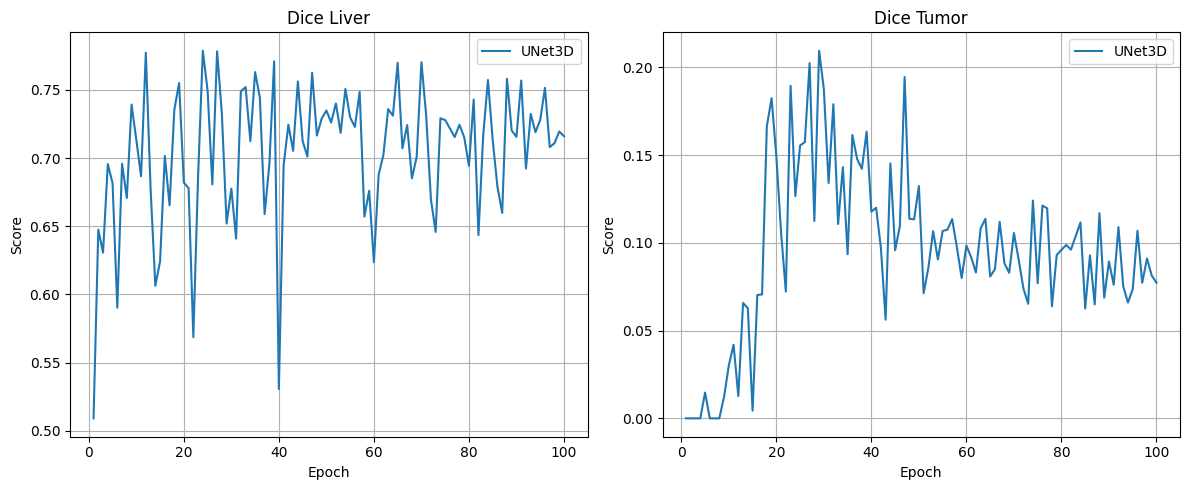

In [6]:
epochs = list(range(1, len(model_unet3d['dice_liver']) + 1))
plt.figure(figsize=(12, 5))

# Dice Liver
plt.subplot(1, 2, 1)
plt.plot(epochs, model_unet3d['dice_liver'], label='UNet3D')
# plt.plot(epochs, model_unet3d_cot['dice_liver'], label='UNet3D + CoT')
# plt.plot(epochs, model_unet3d_cot_da['dice_liver'], label='UNet3D + CoT + DA')
plt.title('Dice Liver')
plt.xlabel('Epoch')
plt.ylabel('Score')
plt.legend()
plt.grid(True)

# Dice Tumor
plt.subplot(1, 2, 2)
plt.plot(epochs, model_unet3d['dice_tumor'], label='UNet3D')
# plt.plot(epochs, model_unet3d_cot['dice_tumor'], label='UNet3D + CoT')
# plt.plot(epochs, model_unet3d_cot_da['dice_tumor'], label='UNet3D + CoT + DA')
plt.title('Dice Tumor')
plt.xlabel('Epoch')
plt.ylabel('Score')
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()

Max dice avg of UNet3D: 0.49034324288368225


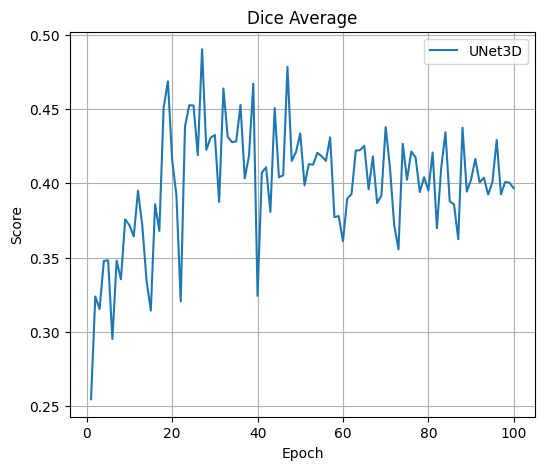

In [7]:
print(f"Max dice avg of UNet3D: {max(model_unet3d['dice_avg'])}")
# print(f"Max dice avg of UNet3D + CoT: {max(model_unet3d_cot['dice_avg'])}")
# print(f"Max dice avg of UNet3D + CoT + DA: {max(model_unet3d_cot_da['dice_avg'])}")


plt.figure(figsize=(6, 5))
plt.plot(epochs, model_unet3d['dice_avg'], label='UNet3D')
# plt.plot(epochs, model_unet3d_cot['dice_avg'], label='UNet3D + CoT')
# plt.plot(epochs, model_unet3d_cot_da['dice_avg'], label='UNet3D + CoT + DA')
plt.title('Dice Average')
plt.xlabel('Epoch')
plt.ylabel('Score')
plt.legend()
plt.grid(True)
plt.show()

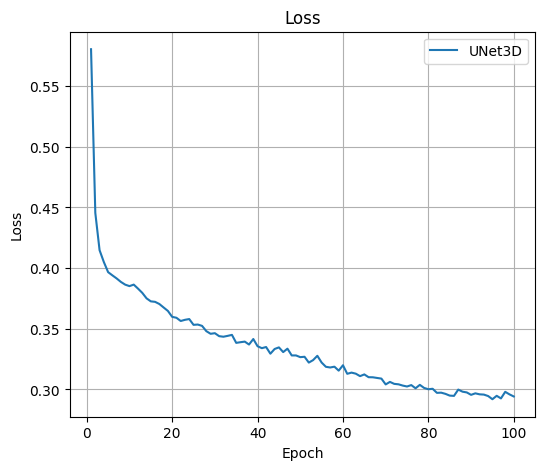

In [8]:
plt.figure(figsize=(6, 5))
plt.plot(epochs, model_unet3d['loss'], label='UNet3D')
# plt.plot(epochs, model_unet3d_cot['loss'], label='UNet3D + CoT')
# plt.plot(epochs, model_unet3d_cot_da['loss'], label='UNet3D + CoT + DA')
plt.title('Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)
plt.show()